# Macroeconomic analysis (2016-2020)

**The objective of this analysis is to examine how the macroeconomic indicators affect the stock prices in Hong Kong between 2016 and 2020**

Data Source:
1. Monthly HSI - Yahoo Fianace
2. Monthly average house price per sqft - Spacious.hk
3. Other macroeconomic indicators - Census and statistics department

**Import libraries**

In [11]:
#!pip3 install pandas
#!pip3 install matplotlib
#!pip3 install seaborn
#!pip3 install numpy
#!pip3 install scipy

     |████████████████████████████████| 285 kB 107 kB/s eta 0:00:01
     |████████████████████████████████| 30.9 MB 282 kB/s eta 0:00:01    |██████████▎                     | 9.9 MB 247 kB/s eta 0:01:25
ERROR: Could not find a version that satisfies the requirement warnings
ERROR: No matching distribution found for warnings


In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.stats import norm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

**Import data**

In [36]:
# For google drive

#from google.colab import drive
#from google.colab import files

#drive.mount('/content/drive')
#data_dir = "/content/drive/My Drive/FYP/centaline/"

In [37]:
# For local directory
data_dir = "../../database_real/macroeconomic_data_centaline_chinese/"

In [43]:
# Data directory

df = pd.DataFrame()

df = pd.read_csv("hang_seng_index.csv")
house_price_df = pd.read_csv("house_price.csv")
population_df = pd.read_csv("population.csv")
unemployment_rate_df = pd.read_csv("unemployment_rate.csv")
import_export_df = pd.read_csv("import_export.csv")
gdp_df = pd.read_csv("gdp.csv")
consumer_price_indices_df = pd.read_csv("ccp_index.csv")

df['house_price'] = house_price_df['average_price_per_sqft']
df['population'] = population_df['number']
df['unemployment_adjusted'] = unemployment_rate_df['unemployment_rate_seasonally_adjusted']
df['unemployment_not_adjusted'] = unemployment_rate_df['unemployment_rate_not_adjusted']
df['imports'] = import_export_df['imports']
df['total_exports'] = import_export_df['total_exports']
df['gdp'] = gdp_df['gdp']
df['ccp_index'] = consumer_price_indices_df['ccp_index']

# Data processing
df['gdp'] = df['gdp'].str.replace(',', '').astype(float)
df = df.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1)
df = df.rename(columns={'Close': 'hsi'})

df.tail(50)

,year,month,hsi,house_price,population,unemployment_adjusted,unemployment_not_adjusted,imports,total_exports,gdp,ccp_index
13,2017,2,23740.73047,12020,7391.7,3.3,3.1,297978,241707,631418.0,103.7
14,2017,3,24111.58984,12104,7391.7,3.3,3.2,364163,321895,631418.0,103.9
15,2017,4,24615.13086,12627,7391.7,3.2,3.2,339520,305389,628277.0,104.5
16,2017,5,25660.65039,12421,7391.7,3.2,3.2,338753,303105,628277.0,104.3
17,2017,6,25764.58008,12606,7391.7,3.1,3.2,377684,329406,628277.0,104.3
18,2017,7,27323.99023,12677,7413.1,3.2,3.3,356190,326589,679352.0,104.7
19,2017,8,27970.30078,12356,7413.1,3.1,3.3,368190,332663,679352.0,104.8
20,2017,9,27554.30078,12755,7413.1,3.1,3.3,403413,358705,679352.0,104.6
21,2017,10,28245.53906,13234,7413.1,3.1,3.1,378694,334735,720337.0,104.9
22,2017,11,29177.34961,13415,7413.1,3.0,3.0,407129,367423,720337.0,105.2


**Univariate analysis**

In [44]:
def univariate_analysis(feature_name):
    # Statistical summary
    print(df[feature_name].describe())

    # Histogram
    plt.figure(figsize=(8,4))
    sns.distplot(df[feature_name], axlabel=feature_name);

count       63.000000
mean     25994.792256
std       3047.799487
min      19111.929690
25%      23672.105470
50%      26312.630860
75%      28264.625000
max      32887.269530
Name: hsi, dtype: float64


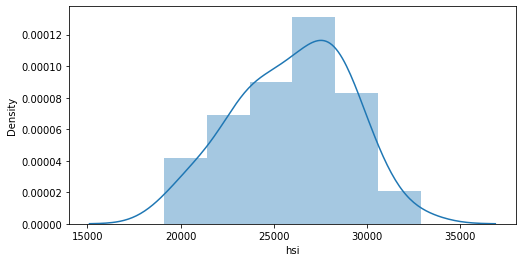

In [45]:
univariate_analysis('hsi')

**Bivariate analysis**

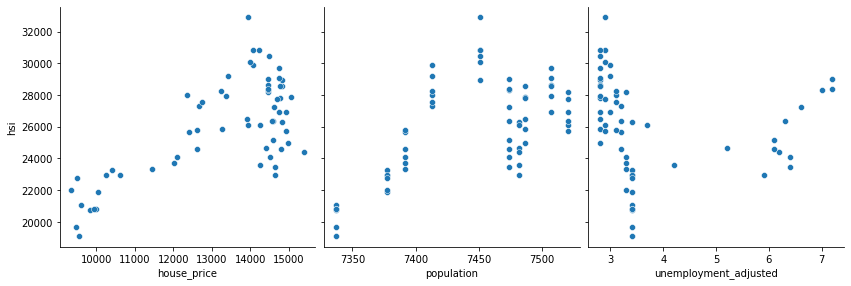

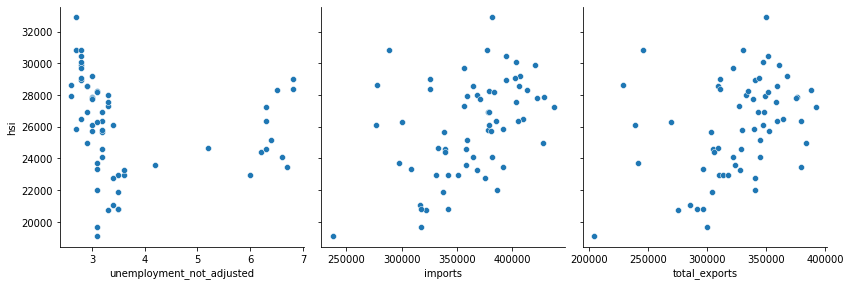

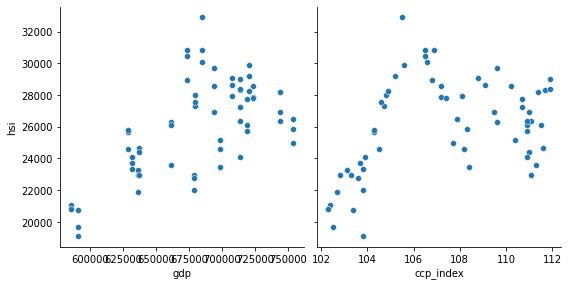

In [46]:
for i in range(3, len(df.columns), 3):
    sns.pairplot(data=df,
                x_vars=df.columns[i:i+3],
                y_vars=['hsi'],
                size=4)

In [47]:
def scatter_plot_with_regline(feature_name):
    x = df[feature_name]
    y = df['hsi']

    plt.scatter(x, y)
    plt.xticks(rotation=45)
    fig = sns.regplot(x=feature_name, y="hsi", data=df)

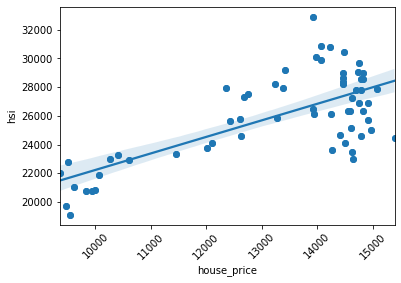

In [48]:
scatter_plot_with_regline("house_price")

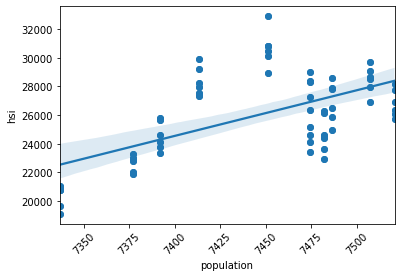

In [49]:
scatter_plot_with_regline("population")

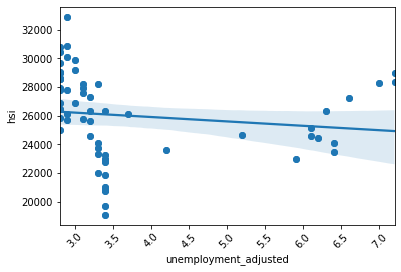

In [50]:
scatter_plot_with_regline("unemployment_adjusted")

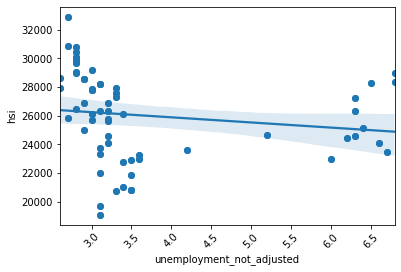

In [51]:
scatter_plot_with_regline("unemployment_not_adjusted")

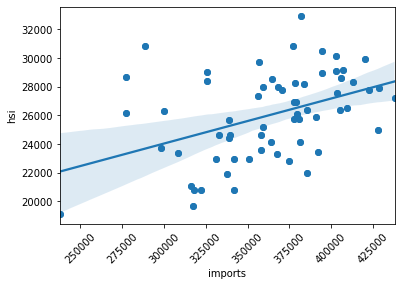

In [52]:
scatter_plot_with_regline("imports")

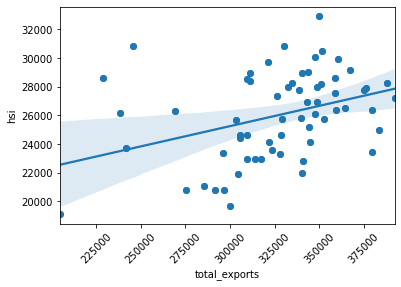

In [53]:
scatter_plot_with_regline("total_exports")

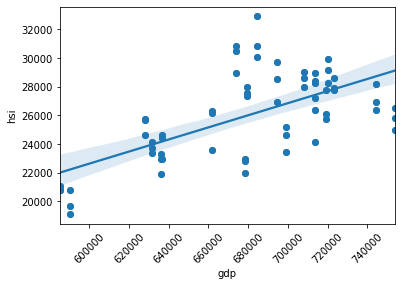

In [54]:
scatter_plot_with_regline("gdp")

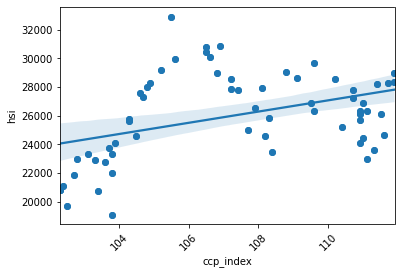

In [55]:
scatter_plot_with_regline("ccp_index")

**Correlation matrix and Heatmap**

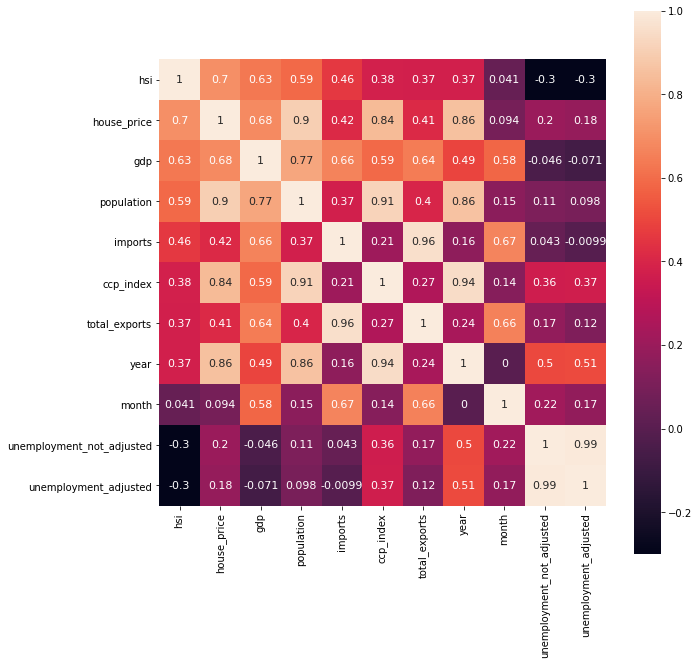

In [68]:
heatmap_df = df.copy()
heatmap_df = heatmap_df[(heatmap_df['year'] < 2021)]

# Heatmap
fig, ax = plt.subplots(figsize=(10,10)) 
cols = heatmap_df.corr().sort_values('hsi', ascending=False).index
cm = np.corrcoef(heatmap_df[cols].values.T)
hm = sns.heatmap(cm, annot=True, square=True, annot_kws={'size':11}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()